# Problem Definition

The problem we are going to look at in this post is theInternational Airline Passengers prediction problem.

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

# 1. Import Libararies

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import math

# 2. Preparing Dataset

## 2.1 Loading dataset

We load the dataset with the first column because we are not interested in dates.

In [33]:
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')

In [34]:
dataset = dataset.values
dataset = dataset.astype('float32')

Plot the dataset:

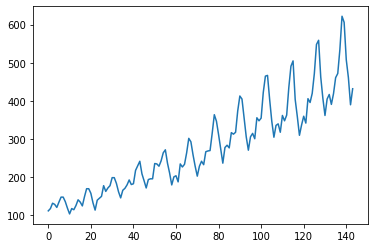

In [35]:
plt.plot(dataset)
plt.show()

## 2.2 Normalize the dataset

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## 2.3 Train and Test dataset

The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [37]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## 2.4 Dataset Creation Function

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time — in this case, defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

In [38]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

reshape input to be [samples, time steps, features]

In [40]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('shape of train dataset',trainX.shape)
print('shape of test dataset',testX.shape)

shape of train dataset (94, 1, 1)
shape of test dataset (46, 1, 1)


# 3. LSTM Model

## 3.1 creation model's network

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

summary of the model:

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## 3.2 compile the model

In [54]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# 3.3 Train the model

In [55]:
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0106
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0106
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 11/

94/94 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.01 - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0106
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0106
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0106
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0106
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0106
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - los

## 3.4 Make predictions

In [56]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

invert predictions:

In [57]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

calculate root mean squared error:

In [59]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.64 RMSE
Test Score: 52.15 RMSE


# 4. Plot Predictions

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

## 4.1 Shift train predictions for plotting

In [62]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

## 4.2 Shift test predictions for plotting

In [64]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

## 4.3 Plot baseline and predictions

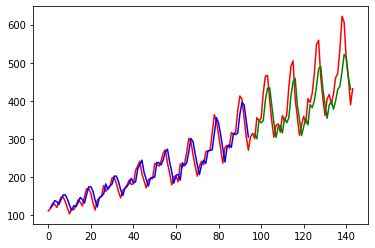

In [66]:
plt.plot(scaler.inverse_transform(dataset), 'red')
plt.plot(trainPredictPlot, 'blue')
plt.plot(testPredictPlot, 'green')
plt.show()

# 5. LSTM for Regression Using the Window Method

We can also phrase the problem so that multiple, recent time steps can be used to make the prediction for the next time step.

This is called a window, and the size of the window is a parameter that can be tuned for each problem.

For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.

In [89]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [90]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('shape of train dataset',trainX.shape)
print('shape of test dataset',testX.shape)

shape of train dataset (92, 1, 3)
shape of test dataset (44, 1, 3)


In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [94]:
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.0109
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.0109
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.0109
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.0109
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.0109
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.0109
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.0109
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.0109
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.0109
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.0109
Epoch 11/

92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 83/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 84/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 85/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 86/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0109
Epoch 87/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 88/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0109
Epoch 89/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 90/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 91/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0109
Epoch 92/100


In [95]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [96]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [97]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.27 RMSE
Test Score: 58.29 RMSE


In [98]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [99]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

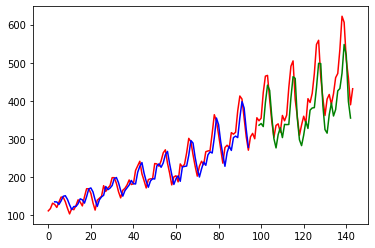

In [100]:
plt.plot(scaler.inverse_transform(dataset), 'red')
plt.plot(trainPredictPlot, 'blue')
plt.plot(testPredictPlot, 'green')
plt.show()

# 6. LSTM for Regression with Time Steps

You may have noticed that the data preparation for the LSTM network includes time steps.

Some sequence problems may have a varied number of time steps per sample. For example, you may have measurements of a physical machine leading up to a point of failure or a point of surge. Each incident would be a sample the observations that lead up to the event would be the time steps, and the variables observed would be the features.

Time steps provide another way to phrase our time series problem. Like above in the window example, we can take prior time steps in our time series as inputs to predict the output at the next time step.

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

We can do this using the same data representation as in the previous window-based example, except when we reshape the data, we set the columns to be the time steps dimension and change the features dimension back to 1. For example:

In [110]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [111]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


print('shape of train dataset',trainX.shape)
print('shape of test dataset',testX.shape)

shape of train dataset (92, 3, 1)
shape of test dataset (44, 3, 1)


In [116]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(look_back, 1)))
model.add(tf.keras.layers.Dense(1))

In [117]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [119]:
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.0109
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.0109
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.0109
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.0109
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.0109
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.0109
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.0109
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0109
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0109
Epoch 10/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.0109
Epoch 11/

92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 84/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0109
Epoch 85/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 86/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0109
Epoch 87/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0109
Epoch 88/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 89/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0109
Epoch 90/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0109
Epoch 91/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0109
Epoch 92/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0109
Epoch 93/100


In [120]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [121]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [122]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.29 RMSE
Test Score: 62.06 RMSE


In [123]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [124]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

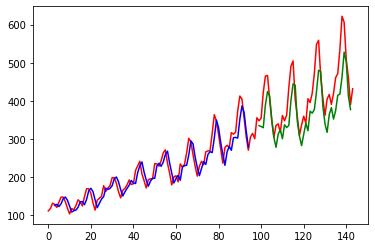

In [125]:
plt.plot(scaler.inverse_transform(dataset), 'red')
plt.plot(trainPredictPlot, 'blue')
plt.plot(testPredictPlot, 'green')
plt.show()